In [1]:
import pandas as pd
import cv2
import os
import re
import requests
import random

In [42]:
image_path = r'C:\Users\Jimmy\Desktop\cb-ds-19\00_Projects\ds-final-project-main\Test Image\azurill.jpg'

In [43]:
sm7 = pd.read_json(r"C:\Users\Jimmy\Desktop\cb-ds-19\00_Projects\ds-final-project-main\cards\en\sm7.json")

In [31]:
sm7.head()

,id,name,supertype,subtypes,hp,...,images,evolvesFrom,abilities,rules,resistances
0,sm7-1,Bellsprout,Pokémon,[Basic],60.0,...,{'small': 'https://images.pokemontcg.io/sm7/1....,NaN,NaN,NaN,NaN
1,sm7-2,Weepinbell,Pokémon,[Stage 1],80.0,...,{'small': 'https://images.pokemontcg.io/sm7/2....,Bellsprout,NaN,NaN,NaN
2,sm7-3,Victreebel,Pokémon,[Stage 2],140.0,...,{'small': 'https://images.pokemontcg.io/sm7/3....,Weepinbell,"[{'name': 'Fragrance Trap', 'text': 'Once duri...",NaN,NaN
3,sm7-4,Scyther,Pokémon,[Basic],70.0,...,{'small': 'https://images.pokemontcg.io/sm7/4....,NaN,NaN,NaN,NaN
4,sm7-5,Spinarak,Pokémon,[Basic],50.0,...,{'small': 'https://images.pokemontcg.io/sm7/5....,NaN,NaN,NaN,NaN


In [45]:
images_sets = sm7['images'].apply(pd.Series)

sm7 = pd.concat([sm7.drop('images', axis = 1),images_sets], axis = 1)

sm7.head()

,id,name,supertype,subtypes,hp,...,abilities,rules,resistances,small,large
0,sm7-1,Bellsprout,Pokémon,[Basic],60.0,...,NaN,NaN,NaN,https://images.pokemontcg.io/sm7/1.png,https://images.pokemontcg.io/sm7/1_hires.png
1,sm7-2,Weepinbell,Pokémon,[Stage 1],80.0,...,NaN,NaN,NaN,https://images.pokemontcg.io/sm7/2.png,https://images.pokemontcg.io/sm7/2_hires.png
2,sm7-3,Victreebel,Pokémon,[Stage 2],140.0,...,"[{'name': 'Fragrance Trap', 'text': 'Once duri...",NaN,NaN,https://images.pokemontcg.io/sm7/3.png,https://images.pokemontcg.io/sm7/3_hires.png
3,sm7-4,Scyther,Pokémon,[Basic],70.0,...,NaN,NaN,NaN,https://images.pokemontcg.io/sm7/4.png,https://images.pokemontcg.io/sm7/4_hires.png
4,sm7-5,Spinarak,Pokémon,[Basic],50.0,...,NaN,NaN,NaN,https://images.pokemontcg.io/sm7/5.png,https://images.pokemontcg.io/sm7/5_hires.png


In [46]:
# Define base path location of all the images
base_path = "../ds-final-project-main/PokemonTCG/SM7/"

# Function to sanitize folder names
def sanitize_folder_name(name):
    # Replace invalid characters with an underscore or remove them
    return re.sub(r'[<>:"/\\|?*]', '', name)

# Function to download and save an image with a formatted filename
def download_image(url, series, name, base_path, image_number):
    # Sanitize the series and name to create valid folder names
    series_safe = sanitize_folder_name(series)
    name_safe = sanitize_folder_name(name)
    
    # Construct the full path using base_path, sanitized series, and name
    final_folder_path = os.path.join(base_path, series_safe, name_safe)
    
    # Ensure the target folder exists
    os.makedirs(final_folder_path, exist_ok=True)
    
    # Format the image filename with leading zeros
    file_name = f'{image_number:03}.png'
    file_path = os.path.join(final_folder_path, file_name)
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        
        # Save the image to the specified path
        with open(file_path, 'wb') as f:
            f.write(response.content)
        
        print(f"Downloaded {file_name} to {final_folder_path}")
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {file_name} for {series_safe}/{name_safe}: {e}")

# Counter to keep track of image numbering
image_counter = 1

# Loop through the DataFrame and download images
for index, row in sm7.iterrows():
    # Pass the counter to the download_image function and increment it
    download_image(row['large'], row['id'], row['name'], base_path, image_counter)
    image_counter += 1

Downloaded 001.png to ../ds-final-project-main/PokemonTCG/SM7/sm7-1\Bellsprout
Downloaded 002.png to ../ds-final-project-main/PokemonTCG/SM7/sm7-2\Weepinbell
Downloaded 003.png to ../ds-final-project-main/PokemonTCG/SM7/sm7-3\Victreebel
Downloaded 004.png to ../ds-final-project-main/PokemonTCG/SM7/sm7-4\Scyther
Downloaded 005.png to ../ds-final-project-main/PokemonTCG/SM7/sm7-5\Spinarak
Downloaded 006.png to ../ds-final-project-main/PokemonTCG/SM7/sm7-6\Ariados
Downloaded 007.png to ../ds-final-project-main/PokemonTCG/SM7/sm7-7\Treecko
Downloaded 008.png to ../ds-final-project-main/PokemonTCG/SM7/sm7-8\Treecko
Downloaded 009.png to ../ds-final-project-main/PokemonTCG/SM7/sm7-9\Grovyle
Downloaded 010.png to ../ds-final-project-main/PokemonTCG/SM7/sm7-10\Sceptile
Downloaded 011.png to ../ds-final-project-main/PokemonTCG/SM7/sm7-10a\Sceptile
Downloaded 012.png to ../ds-final-project-main/PokemonTCG/SM7/sm7-11\Seedot
Downloaded 013.png to ../ds-final-project-main/PokemonTCG/SM7/sm7-12\Seed

In [47]:
base_dir = "../ds-final-project-main/PokemonTCG/SM7/"

def get_random_png_file(base_dir):
    png_files = []

    # Walk through all subdirectories and files
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.png'):
                # Construct the full path to the file
                full_path = os.path.join(root, file)
                png_files.append(full_path)
    
    # Check if there are any png files found
    if not png_files:
        raise FileNotFoundError("No .png files found in the specified directory.")
    
    # Select a random .png file
    random_file = random.choice(png_files)
    return random_file

# Get a random .png file
random_png_file = get_random_png_file(base_dir)
print(f"Random .png file selected: {random_png_file}")

Random .png file selected: ../ds-final-project-main/PokemonTCG/SM7/sm7-34\Marshtomp\035.png


In [59]:
import cv2

# Load image and template
image = cv2.imread(image_path)
template = cv2.imread(random_png_file)

# Get dimensions of the image
image_height, image_width = image.shape[:2]
print(f"Image Resolution: {image_width}x{image_height}")

# Get dimensions of the template
template_height, template_width = template.shape[:2]
print(f"Template Resolution: {template_width}x{template_height}")

Image Resolution: 2682x3576
Template Resolution: 734x1024


In [21]:
image_path = r'C:\Users\Jimmy\Desktop\cb-ds-19\00_Projects\ds-final-project-main\Test Image\azurill.jpg'
image_path2 = r'C:\Users\Jimmy\Desktop\cb-ds-19\00_Projects\ds-final-project-main\Test Image\PXL_20240917_042837491.RAW-01.COVER.jpg'
image_path3 = r'C:\Users\Jimmy\Desktop\cb-ds-19\00_Projects\ds-final-project-main\Test Image\stock-photo-hamburg-germany-photo-of-the-english-pokemon-swsh-black-star-promo-card-pikachu-on-2225867205.jpg'
image_path4 = r'C:\Users\Jimmy\Desktop\cb-ds-19\00_Projects\ds-final-project-main\Test Image\PXL_20240917_042924698.RAW-01.COVER.jpg'
image_path5 = r'C:\Users\Jimmy\Desktop\cb-ds-19\00_Projects\ds-final-project-main\Test Image\PXL_20240917_043457414.RAW-01.COVER.jpg'

In [31]:
%matplotlib inline

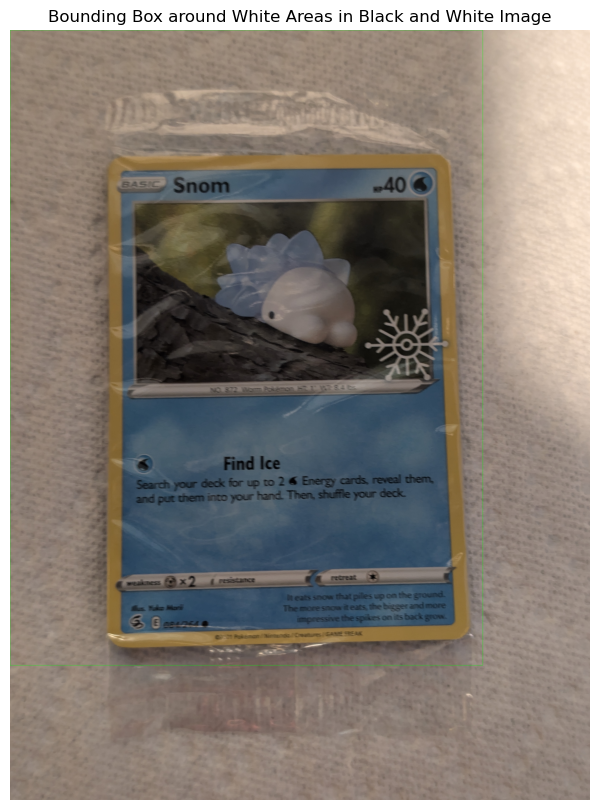

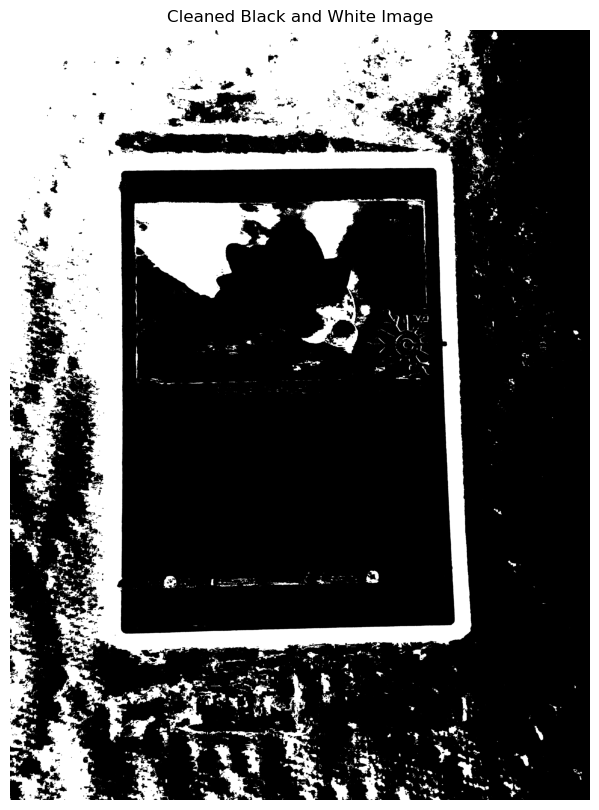

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(image_path4)

# Check if the image is loaded correctly
if image is None:
    raise ValueError(f"Image at path '{image_path2}' could not be loaded. Please check the file path and ensure the image exists.")

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the color range for gold
gold_lower_bound = np.array([10, 50, 50])
gold_upper_bound = np.array([30, 255, 255])

# Create a mask for gold color
gold_mask = cv2.inRange(hsv_image, gold_lower_bound, gold_upper_bound)

# Convert the gold mask to a black-and-white image
bw_image = gold_mask

# Remove small white areas and noise
kernel = np.ones((5, 5), np.uint8)
cleaned_image = cv2.morphologyEx(bw_image, cv2.MORPH_CLOSE, kernel)

# Find contours in the cleaned black-and-white image
contours, _ = cv2.findContours(cleaned_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize the best bounding box
best_bbox = None

if contours:
    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Define the bounding box coordinates
    min_x, min_y = x, y
    max_x, max_y = x + w, y + h
    
    best_bbox = {
        'min_x': min_x,
        'max_x': max_x,
        'min_y': min_y,
        'max_y': max_y
    }

# Draw the bounding box on the original image
if best_bbox:
    # Draw the bounding box on the image
    image_with_box = image.copy()
    cv2.rectangle(image_with_box, (best_bbox['min_x'], best_bbox['min_y']),
                  (best_bbox['max_x'], best_bbox['max_y']),
                  (0, 255, 0), 2)

    # Display the image with bounding box
    plt.figure(figsize=(10, 10))
    plt.title('Bounding Box around White Areas in Black and White Image')
    plt.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
    plt.axis('off')

# Display the cleaned black-and-white image
plt.figure(figsize=(10, 10))
plt.title('Cleaned Black and White Image')
plt.imshow(cleaned_image, cmap='gray')
plt.axis('off')

plt.show()


In [54]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(image_path)

# Convert from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()